In [122]:
import matplotlib.pyplot as plt  # fine tune control over visualizations
import numpy as np  # to manipulate data/generate random numbers
import pandas as pd  # to read/manipulate/write data from files
import seaborn as sns  # static visualizations

from scipy.cluster.hierarchy import cophenet, linkage, dendrogram  # to perform cluster analysis
from scipy.spatial.distance import pdist, squareform  # to calculate distances and convert between condensed and square forms of a distance matrix
from sklearn.preprocessing import MinMaxScaler  # To standardize our data before clustering

In [124]:
subset_df = pd.read_csv('subset_df.csv', header = 0, delimiter=',',  engine='python')
subset_df.head()

,subjectkey,interview_date,interview_age,sex,site_id_l,anthroheightcalc,anthroweightcalc,ehi_y_ss_scoreb,neighborhood_crime_y,snellen_aid_y,ksads_1_2_t,ksads_8_29_t,ksads_25_33_t,ksads_13_929_t,pps_y_ss_severity_score,prosocial_q2_y,prosocial_q3_y,smri_vol_cdk_total,smri_vol_scs_amygdalalh,mri_info_manufacturer
0,NDAR_INV41A6MY1V,06/30/2018,127,M,site12,54.625,97.5,2,1.0,0.0,1,0,555,555,7.0,2.0,2.0,594961.0,1845.7,SIEMENS
1,NDAR_INVADX6U66L,07/28/2017,128,F,site20,56.250,91.5,1,5.0,0.0,0,0,555,555,0.0,2.0,2.0,603866.0,1631.3,SIEMENS
2,NDAR_INVCJW0RAFP,02/11/2017,113,F,site10,49.250,53.5,1,1.0,0.0,0,0,555,555,9.0,2.0,2.0,498626.0,1526.7,GE MEDICAL SYSTEMS
3,NDAR_INVXPLRAK5R,11/03/2016,131,F,site02,55.000,71.5,1,5.0,0.0,0,0,555,555,0.0,2.0,2.0,606928.0,1729.1,SIEMENS
4,NDAR_INVALY5B82T,05/12/2017,108,F,site13,53.000,61.0,1,3.0,0.0,1,0,555,555,30.0,2.0,2.0,529775.0,1238.2,GE MEDICAL SYSTEMS


In [125]:
subset_df.set_index("subjectkey", inplace=True)


In [126]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, NDAR_INV41A6MY1V to NDAR_INVB3CU3GHK
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   interview_date           1000 non-null   object 
 1   interview_age            1000 non-null   int64  
 2   sex                      1000 non-null   object 
 3   site_id_l                1000 non-null   object 
 4   anthroheightcalc         1000 non-null   float64
 5   anthroweightcalc         1000 non-null   float64
 6   ehi_y_ss_scoreb          1000 non-null   int64  
 7   neighborhood_crime_y     1000 non-null   float64
 8   snellen_aid_y            1000 non-null   float64
 9   ksads_1_2_t              1000 non-null   int64  
 10  ksads_8_29_t             1000 non-null   int64  
 11  ksads_25_33_t            1000 non-null   int64  
 12  ksads_13_929_t           1000 non-null   int64  
 13  pps_y_ss_severity_score  1000 non-null   float64
 14  pr

In [127]:
subset_df["interview_date"] = pd.to_datetime(subset_df["interview_date"])

In [128]:
subset_df.head()

,interview_date,interview_age,sex,site_id_l,anthroheightcalc,anthroweightcalc,ehi_y_ss_scoreb,neighborhood_crime_y,snellen_aid_y,ksads_1_2_t,ksads_8_29_t,ksads_25_33_t,ksads_13_929_t,pps_y_ss_severity_score,prosocial_q2_y,prosocial_q3_y,smri_vol_cdk_total,smri_vol_scs_amygdalalh,mri_info_manufacturer
subjectkey,,,,,,,,,,,,,,,,,,,
NDAR_INV41A6MY1V,2018-06-30,127,M,site12,54.625,97.5,2,1.0,0.0,1,0,555,555,7.0,2.0,2.0,594961.0,1845.7,SIEMENS
NDAR_INVADX6U66L,2017-07-28,128,F,site20,56.250,91.5,1,5.0,0.0,0,0,555,555,0.0,2.0,2.0,603866.0,1631.3,SIEMENS
NDAR_INVCJW0RAFP,2017-02-11,113,F,site10,49.250,53.5,1,1.0,0.0,0,0,555,555,9.0,2.0,2.0,498626.0,1526.7,GE MEDICAL SYSTEMS
NDAR_INVXPLRAK5R,2016-11-03,131,F,site02,55.000,71.5,1,5.0,0.0,0,0,555,555,0.0,2.0,2.0,606928.0,1729.1,SIEMENS
NDAR_INVALY5B82T,2017-05-12,108,F,site13,53.000,61.0,1,3.0,0.0,1,0,555,555,30.0,2.0,2.0,529775.0,1238.2,GE MEDICAL SYSTEMS


In [129]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, NDAR_INV41A6MY1V to NDAR_INVB3CU3GHK
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   interview_date           1000 non-null   datetime64[ns]
 1   interview_age            1000 non-null   int64         
 2   sex                      1000 non-null   object        
 3   site_id_l                1000 non-null   object        
 4   anthroheightcalc         1000 non-null   float64       
 5   anthroweightcalc         1000 non-null   float64       
 6   ehi_y_ss_scoreb          1000 non-null   int64         
 7   neighborhood_crime_y     1000 non-null   float64       
 8   snellen_aid_y            1000 non-null   float64       
 9   ksads_1_2_t              1000 non-null   int64         
 10  ksads_8_29_t             1000 non-null   int64         
 11  ksads_25_33_t            1000 non-null   int64         
 12  ksads_13_929

In [130]:
cat_df = subset_df.select_dtypes(include=["object"])
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, NDAR_INV41A6MY1V to NDAR_INVB3CU3GHK
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sex                    1000 non-null   object
 1   site_id_l              1000 non-null   object
 2   mri_info_manufacturer  1000 non-null   object
dtypes: object(3)
memory usage: 31.2+ KB


In [131]:
cat_df.head()

,sex,site_id_l,mri_info_manufacturer
subjectkey,,,
NDAR_INV41A6MY1V,M,site12,SIEMENS
NDAR_INVADX6U66L,F,site20,SIEMENS
NDAR_INVCJW0RAFP,F,site10,GE MEDICAL SYSTEMS
NDAR_INVXPLRAK5R,F,site02,SIEMENS
NDAR_INVALY5B82T,F,site13,GE MEDICAL SYSTEMS


In [132]:
cat_features = pd.get_dummies(cat_df, drop_first=True)

In [133]:
cat_features

,sex_M,site_id_l_site02,site_id_l_site03,site_id_l_site04,site_id_l_site05,site_id_l_site06,site_id_l_site07,site_id_l_site08,site_id_l_site09,site_id_l_site10,...,site_id_l_site15,site_id_l_site16,site_id_l_site17,site_id_l_site18,site_id_l_site19,site_id_l_site20,site_id_l_site21,site_id_l_site22,mri_info_manufacturer_Philips Medical Systems,mri_info_manufacturer_SIEMENS
subjectkey,,,,,,,,,,,,,,,,,,,,,
NDAR_INV41A6MY1V,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
NDAR_INVADX6U66L,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
NDAR_INVCJW0RAFP,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
NDAR_INVXPLRAK5R,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
NDAR_INVALY5B82T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDAR_INVDEVYGDL7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NDAR_INVMAFGTMLE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NDAR_INVVAMKAM75,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
num_df = subset_df.select_dtypes(include=["int", 'float'])
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, NDAR_INV41A6MY1V to NDAR_INVB3CU3GHK
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   interview_age            1000 non-null   int64  
 1   anthroheightcalc         1000 non-null   float64
 2   anthroweightcalc         1000 non-null   float64
 3   ehi_y_ss_scoreb          1000 non-null   int64  
 4   neighborhood_crime_y     1000 non-null   float64
 5   snellen_aid_y            1000 non-null   float64
 6   ksads_1_2_t              1000 non-null   int64  
 7   ksads_8_29_t             1000 non-null   int64  
 8   ksads_25_33_t            1000 non-null   int64  
 9   ksads_13_929_t           1000 non-null   int64  
 10  pps_y_ss_severity_score  1000 non-null   float64
 11  prosocial_q2_y           1000 non-null   float64
 12  prosocial_q3_y           1000 non-null   float64
 13  smri_vol_cdk_total       1000 non-null   float64
 14  sm

In [137]:
minmax = MinMaxScaler(feature_range=(0, 1))

num_features = pd.DataFrame(
    minmax.fit_transform(num_df),
    index=num_df.index,
    columns=num_df.columns
)

In [138]:
df_scaled = pd.concat([num_features, cat_features], axis="columns")

# Confirm that all data lies between zero and one.
print(f"Data min, max: {df_scaled.min().min(), df_scaled.max().max()}")

Data min, max: (0.0, 1.0000000000000002)


In [139]:
!pip install gower

In [140]:
import gower

In [141]:
Y = gower.gower_matrix(df_scaled.T).astype(np.float64)

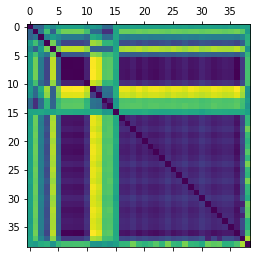

In [142]:
plt.matshow(Y)

In [143]:
Y = squareform(Y)
Z = linkage(Y, method="complete", optimal_ordering=True)

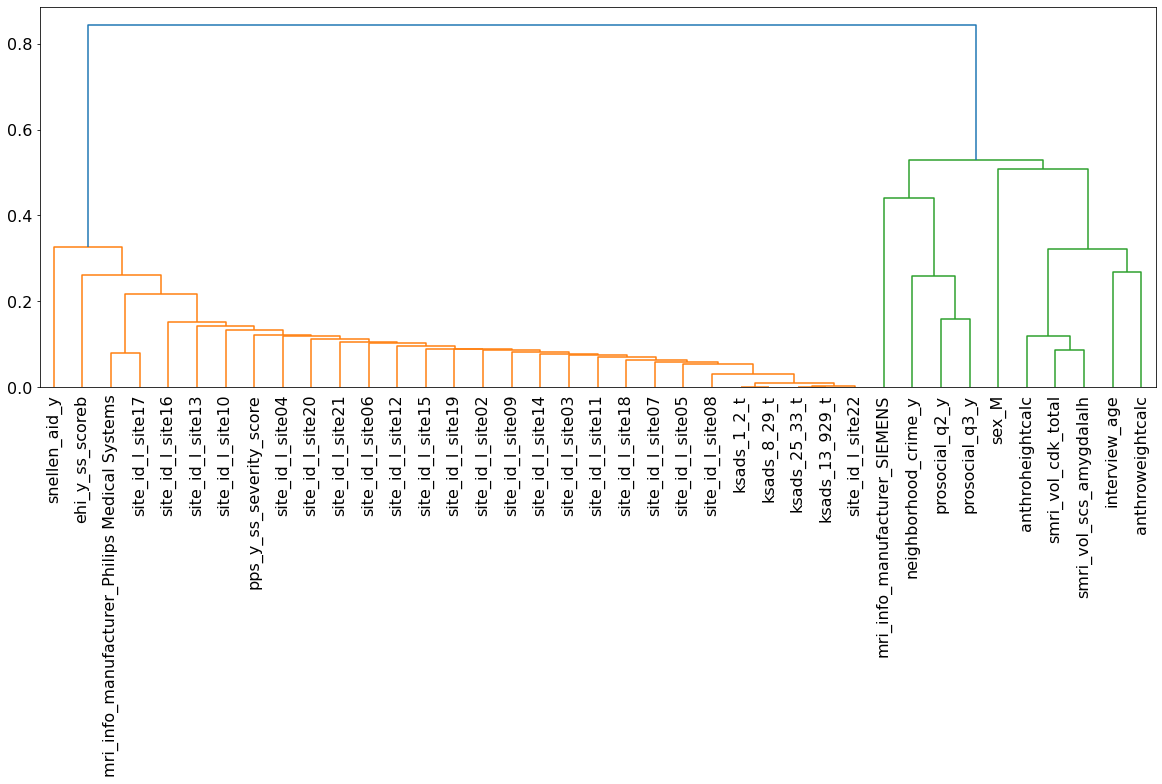

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
dn = dendrogram(
    Z,
    ax=ax,
    orientation="top",
    distance_sort='descending',
    show_leaf_counts=True,
)

# `dn["ivl"] stores a list of the feature indices in the order they appear on the x axis.
# Let's label the x-axis using the actual feature names rather than the indices
_ = ax.set_xticklabels(
    [list(df_scaled.columns)[int(i)] for i in dn["ivl"]],
    rotation=90,
    fontsize=16,
)

yticks = np.linspace(0.0, 0.8, 5)
_ = ax.set_yticks(yticks)
_ = ax.set_yticklabels([round(y, 1) for y in yticks], fontsize=16)

* I had isses with the columns I selected for Part 1 and 2, so used the columns in the viewABCD example. 

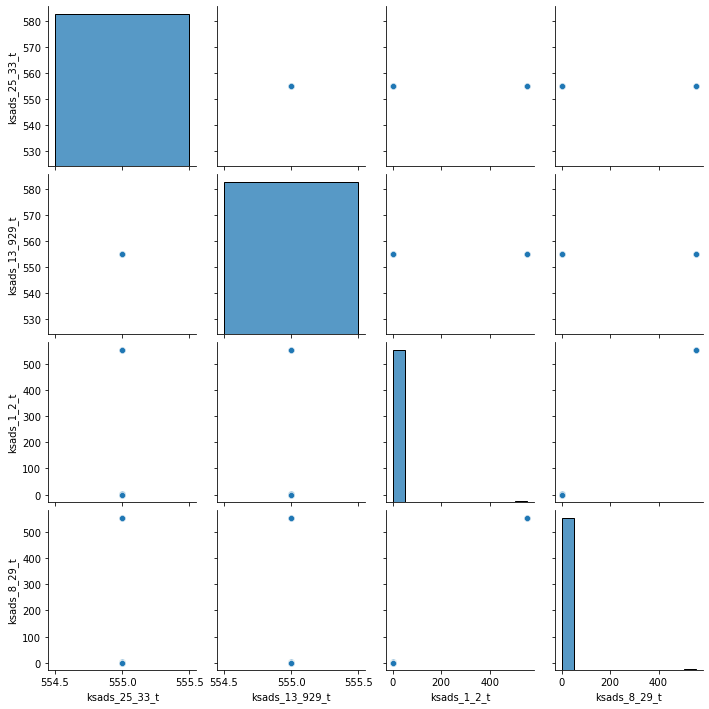

In [148]:
_ = sns.pairplot(
    subset_df,
    vars=["ksads_25_33_t", "ksads_13_929_t", "ksads_1_2_t", "ksads_8_29_t"]
)

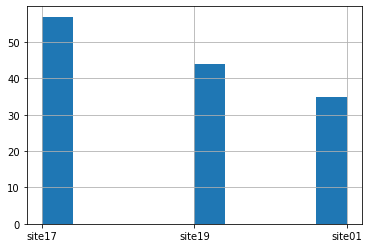

In [149]:
_ = subset_df[subset_df["mri_info_manufacturer"] == "Philips Medical Systems"]["site_id_l"].hist()

In [150]:
c, coph_dists = cophenet(Z, pdist(df_scaled.T.values, "cityblock"))
print(f"Cophenetic correlation coefficient: {c}")

Cophenetic correlation coefficient: 0.941160627206103
